In [1]:
import yfinance as yf
import pandas as pd
import time

# Predefined list of top 100 most active stock tickers
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'BRK.B', 'JNJ', 'V', 'WMT',
    'JPM', 'PG', 'UNH', 'NVDA', 'HD', 'DIS', 'PYPL', 'MA', 'VZ', 'ADBE',
    'NFLX', 'INTC', 'CMCSA', 'KO', 'PFE', 'T', 'MRK', 'PEP', 'XOM', 'CSCO',
    'ABT', 'CVX', 'NKE', 'LLY', 'ABBV', 'MCD', 'CRM', 'ACN', 'MDT', 'AVGO',
    'QCOM', 'COST', 'DHR', 'TXN', 'NEE', 'WFC', 'BMY', 'LIN', 'HON', 'PM',
    'UNP', 'AMGN', 'SBUX', 'LOW', 'ORCL', 'MS', 'IBM', 'INTU', 'AMD', 'BA',
    'GS', 'CAT', 'GE', 'PLD', 'NOW', 'SPGI', 'BLK', 'TMO', 'MDLZ', 'ISRG',
    'AMT', 'CVS', 'BKNG', 'ZTS', 'DE', 'CHTR', 'SYK', 'ADP', 'MO', 'LMT',
    'AXP', 'GILD', 'CB', 'SCHW', 'CI', 'MMC', 'TGT', 'BDX', 'DUK', 'MMM',
    'MU', 'FIS', 'C', 'NSC', 'SO', 'PNC', 'USB', 'EL', 'ITW', 'TFC', 'SHW'
]

# Initialize an empty list to hold the data
data = []

# Loop through each ticker
for ticker in tickers:
    try:
        # Fetch the company's data
        company = yf.Ticker(ticker)
        info = company.info
        data.append(info)
        
        # To avoid hitting request limits, pause between requests
        time.sleep(0.5)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('top_100_most_active_stocks.csv', index=False)

print("Data saved to top_100_most_active_stocks.csv")



                    address1           city state         zip        country  \
0         One Apple Park Way      Cupertino    CA       95014  United States   
1          One Microsoft Way        Redmond    WA  98052-6399  United States   
2     410 Terry Avenue North        Seattle    WA  98109-5210  United States   
3  1600 Amphitheatre Parkway  Mountain View    CA       94043  United States   
4                        NaN            NaN   NaN         NaN            NaN   

            phone                      website  \
0  (408) 996-1010        https://www.apple.com   
1    425 882 8080    https://www.microsoft.com   
2    206 266 1000  https://www.aboutamazon.com   
3    650-253-0000              https://abc.xyz   
4             NaN                          NaN   

                         industry                   industryKey  \
0            Consumer Electronics          consumer-electronics   
1       Software - Infrastructure       software-infrastructure   
2                

In [17]:

import pandas as pd

# Load the raw data
df = pd.read_csv("top_100_most_active_stocks.csv")

# 1. Drop fully duplicate rows
df = df.drop_duplicates()

# 2. Drop rows with too many missing values (e.g., more than 80% missing)
threshold = int(0.8 * len(df.columns))  # Define threshold (80% of columns missing)
df = df.dropna(thresh=threshold)  # Drop rows with more than the threshold missing

# 3. Handle remaining missing values properly
for col in df.select_dtypes(include=['object']).columns:  # Only apply to object columns
    df[col] = df[col].astype(str).fillna("N/A")  # Convert to string before filling

# 4. Convert numeric columns to proper types
numeric_cols = ["marketCap", "trailingPE", "priceToBook", "fiftyTwoWeekHigh", "fiftyTwoWeekLow"]
for col in numeric_cols:
    if col in df.columns:  # Ensure the column exists before converting
        df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert, setting invalid values to NaN

# 5. Remove special characters from column names
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)

# 6. Save the cleaned data
df.to_csv("cleaned_top_100_stocks.csv", index=False)

print("Data cleaned and saved as cleaned_top_100_stocks.csv (No FutureWarning)")




Data cleaned and saved as cleaned_top_100_stocks.csv (No FutureWarning)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the cleaned dataset
df = pd.read_csv("cleaned_top_100_stocks.csv")

# 1. Choose relevant features, including revenue growth & hiring metrics
features = [
    "trailingPE", "priceToBook", "fiftyTwoWeekHigh", "fiftyTwoWeekLow",
    "revenueGrowth", "totalRevenue", "grossMargins", "fullTimeEmployees", "operatingMargins"
]

# Ensure the selected columns exist and drop missing values
df = df[features].dropna()

# 2. Normalize numerical features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Apply K-Means clustering (let’s start with k=3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("Clustering complete! Sample results:")
print(df.head())

# Save the clustered data
df.to_csv("clustered_top_100_stocks.csv", index=False)
print("Data saved as clustered_top_100_stocks.csv")



Clustering complete! Sample results:
   trailingPE  priceToBook  fiftyTwoWeekHigh  fiftyTwoWeekLow  revenueGrowth  \
0   39.082672    55.392067            260.10           164.08          0.040   
1   33.558872    10.221311            468.35           385.58          0.123   
2   40.303800     8.256038            242.52           151.61          0.105   
3   22.955223     6.932612            207.05           130.67          0.118   
4  172.038830    15.631616            488.54           138.80          0.021   

   totalRevenue  grossMargins  fullTimeEmployees  operatingMargins  Cluster  
0  3.957600e+11       0.46519           150000.0           0.34459        0  
1  2.618020e+11       0.69409           228000.0           0.45458        0  
2  6.379590e+11       0.48854          1556000.0           0.11291        2  
3  3.500180e+11       0.58200           183323.0           0.33967        0  
4  9.769000e+10       0.17863           125665.0           0.06158        0  
Data saved as 

Matplotlib is building the font cache; this may take a moment.


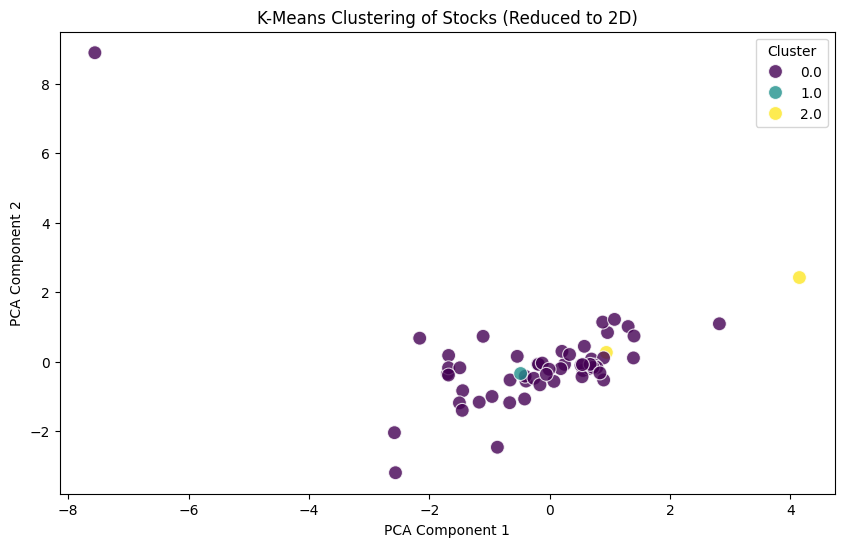

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_plot = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_plot["Cluster"] = df["Cluster"]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df_plot, s=100, alpha=0.8)
plt.title("K-Means Clustering of Stocks (Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


/var/folders/5m/c5jr_1bd2kjb79wlhw1yjp8r0000gn/T/ipykernel_61372/4009597999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


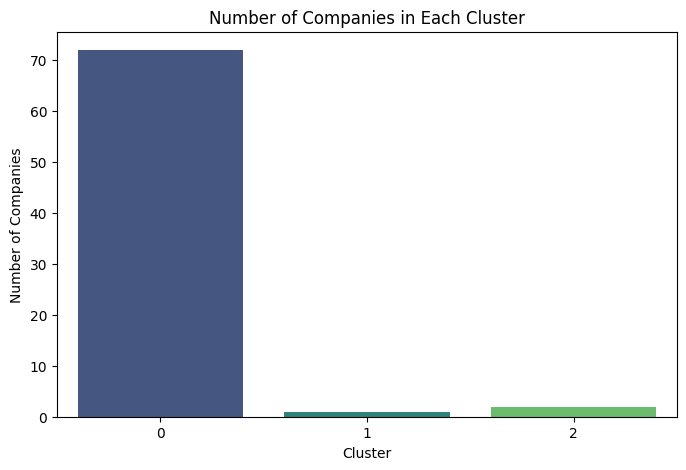

In [4]:
# Count the number of companies in each cluster
cluster_counts = df["Cluster"].value_counts()

# Plot the distribution of clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Number of Companies in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Companies")
plt.show()


In [5]:
print(df.groupby("Cluster").mean())  # View the average financial metrics per cluster


         trailingPE  priceToBook  fiftyTwoWeekHigh  fiftyTwoWeekLow  \
Cluster                                                               
0         36.617093    11.637808        290.273333       191.350988   
1         33.975830   -45.575110       5337.240000      3180.000000   
2         40.236610     8.559951        173.910000       104.690000   

         revenueGrowth  totalRevenue  grossMargins  fullTimeEmployees  \
Cluster                                                                 
0             0.091431  6.904846e+10      0.505377       1.125963e+05   
1             0.089000  2.305200e+10      0.846740       2.420000e+04   
2             0.080000  6.558890e+11      0.367755       1.828000e+06   

         operatingMargins  
Cluster                    
0                0.253772  
1                0.408930  
2                0.076230  


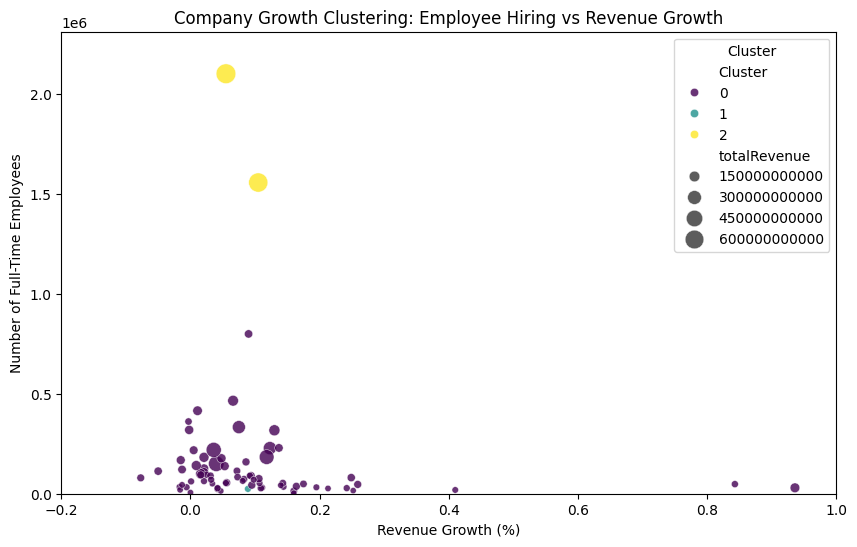

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Revenue Growth vs. Full-Time Employees
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["revenueGrowth"], 
    y=df["fullTimeEmployees"], 
    hue=df["Cluster"], 
    palette="viridis", 
    size=df["totalRevenue"],  # Bigger markers for larger companies
    sizes=(20, 200), 
    alpha=0.8
)

# Labels & Title
plt.xlabel("Revenue Growth (%)")
plt.ylabel("Number of Full-Time Employees")
plt.title("Company Growth Clustering: Employee Hiring vs Revenue Growth")
plt.legend(title="Cluster")
plt.xlim(-0.2, 1)  # Set x-axis limit for better visualization
plt.ylim(0, df["fullTimeEmployees"].max() * 1.1)  # Adjust y-axis limit

# Show plot
plt.show()


In [12]:
print("Columns in df_clustered:", df_clustered.columns)
print("Columns in df_original:", df_original.columns)


Columns in df_clustered: Index(['trailingPE', 'priceToBook', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow',
       'revenueGrowth', 'totalRevenue', 'grossMargins', 'fullTimeEmployees',
       'operatingMargins', 'Cluster'],
      dtype='object')
Columns in df_original: Index(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website',
       'industry', 'industryKey', 'industryDisp',
       ...
       'averageAnalystRating', 'cryptoTradeable', 'displayName',
       'trailingPegRatio', 'address2', 'prevName', 'nameChangeDate', 'fax',
       'industrySymbol', 'ipoExpectedDate'],
      dtype='object', length=186)


In [13]:
import pandas as pd
from IPython.display import display

# Load the clustered dataset
df_clustered = pd.read_csv("clustered_top_100_stocks.csv")

# Load original dataset to get company names
df_original = pd.read_csv("cleaned_top_100_stocks.csv")

# Check available columns
print("Columns in df_clustered:", df_clustered.columns)
print("Columns in df_original:", df_original.columns)

# Ensure we have a valid column to map company names
if "displayName" in df_original.columns:
    df_clustered["Company"] = df_original["displayName"]
else:
    df_clustered["Company"] = df_clustered.index  # Default to index if no name is available

# Function to get top 3 companies per category across all clusters
def get_top_companies(df, sort_by, ascending_order, category_name):
    df_sorted = df.sort_values(by=sort_by, ascending=ascending_order).copy()
    df_sorted = df_sorted.drop_duplicates(subset=["Company"])  # Drop duplicates
    df_sorted = df_sorted.head(3)  # Keep only top 3
    df_sorted["Category"] = category_name
    df_sorted["Rank"] = range(1, len(df_sorted) + 1)
    return df_sorted

# Select **only the top 3 per category across ALL clusters**
established = get_top_companies(df_clustered, ["totalRevenue", "revenueGrowth"], [False, True], "🟢 Established Corporations (High Revenue, Low Growth)")
emerging = get_top_companies(df_clustered[(df_clustered["totalRevenue"] > df_clustered["totalRevenue"].median()) & 
                                          (df_clustered["revenueGrowth"] > df_clustered["revenueGrowth"].quantile(0.75))],
                             ["revenueGrowth"], [False], "🔵 Emerging Market Leaders (Moderate Revenue, High Growth)")
expanding = get_top_companies(df_clustered, ["revenueGrowth", "fullTimeEmployees"], [False, False], "🟠 Expanding Giants (High Growth, Large Hiring)")
lean_growth = get_top_companies(df_clustered, ["revenueGrowth", "fullTimeEmployees"], [False, True], "🟣 Lean High-Growth Startups (High Growth, Small Team)")

# Combine all selected categories into one final DataFrame
summary_df = pd.concat([established, emerging, expanding, lean_growth])

# Select relevant columns for clarity
summary_df = summary_df[["Category", "Rank", "Company", "Cluster"]]

# Sort for better readability
summary_df = summary_df.sort_values(by=["Category", "Rank"])

# **Increase column width for better readability**
pd.set_option("display.max_colwidth", 100)

# Display results in a clear, labeled table
print("\n📊 **Top 3 Companies Per Category (Across All Clusters) Using Company Names** 📊")
display(summary_df)



Columns in df_clustered: Index(['trailingPE', 'priceToBook', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow',
       'revenueGrowth', 'totalRevenue', 'grossMargins', 'fullTimeEmployees',
       'operatingMargins', 'Cluster'],
      dtype='object')
Columns in df_original: Index(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website',
       'industry', 'industryKey', 'industryDisp',
       ...
       'averageAnalystRating', 'cryptoTradeable', 'displayName',
       'trailingPegRatio', 'address2', 'prevName', 'nameChangeDate', 'fax',
       'industrySymbol', 'ipoExpectedDate'],
      dtype='object', length=186)

📊 **Top 3 Companies Per Category (Across All Clusters) Using Company Names** 📊


,Category,Rank,Company,Cluster
9,"🔵 Emerging Market Leaders (Moderate Revenue, High Growth)",1,NaN,0
40,"🔵 Emerging Market Leaders (Moderate Revenue, High Growth)",2,Danaher,0
27,"🔵 Emerging Market Leaders (Moderate Revenue, High Growth)",3,Cisco Systems,0
9,"🟠 Expanding Giants (High Growth, Large Hiring)",1,NaN,0
67,"🟠 Expanding Giants (High Growth, Large Hiring)",2,Intuitive Surgical,0
50,"🟠 Expanding Giants (High Growth, Large Hiring)",3,Starbucks,0
6,"🟢 Established Corporations (High Revenue, Low Growth)",1,Visa,2
2,"🟢 Established Corporations (High Revenue, Low Growth)",2,Amazon.com,2
0,"🟢 Established Corporations (High Revenue, Low Growth)",3,Apple,0
9,"🟣 Lean High-Growth Startups (High Growth, Small Team)",1,NaN,0
